In [259]:
import math
import numpy as np
import matplotlib.pyplot as plt

def avg(lst) -> int: 
    return sum(lst) / len(lst)

def uncertainty(num) -> int:
    return (num ** 0.5)

def addUncertainties(lst) -> int:
    lst2 = list(map(lambda x: str(x) + " +/- " + f"{uncertainty(x):.2f}", lst))
    return lst2

def plot_exp_fit(xlst, ylst, err, color : str): 
    err = [i / j for (i, j) in zip(err, ylst)]
    plt.errorbar(xlst, list(map(lambda x: np.log(x), ylst)), yerr = err, fmt = color + 'o')
    xlst = np.array(xlst)
    fit = np.array(list(map(lambda x: np.log(x), ylst)))
    [m, b], V = np.polyfit(xlst, fit, 1, cov = True)
    plt.plot(xlst, m * xlst + b, color)
    m_err, b_err = V[0][0], V[1, 1]
    print("Absorption coefficient: " + str(-m) + " +/- " + str(np.sqrt(m_err)))
 
    plt.show()
    return m, b

freeCounts = [1697, 1715, 1727, 2001, 1892, 1838, 1821, 1925, 1792, 1829]

In [244]:
for i in addUncertainties(freeCounts): 
    print(i)
    
print("average: " + str(avg(freeCounts)))

1697 +/- 41.19
1715 +/- 41.41
1727 +/- 41.56
2001 +/- 44.73
1892 +/- 43.50
1838 +/- 42.87
1821 +/- 42.67
1925 +/- 43.87
1792 +/- 42.33
1829 +/- 42.77
average: 1823.7


In [245]:
aluminumCounts = [1202, 1187, 1281, 1131, 1160, 1102, 1152, 1272, 1223, 1105]
for i in addUncertainties(aluminumCounts): 
    print(i)
    
print("average: " + str(avg(aluminumCounts)))

1202 +/- 34.67
1187 +/- 34.45
1281 +/- 35.79
1131 +/- 33.63
1160 +/- 34.06
1102 +/- 33.20
1152 +/- 33.94
1272 +/- 35.67
1223 +/- 34.97
1105 +/- 33.24
average: 1181.5


In [246]:
copperCounts = [736, 674, 490, 606, 524, 702, 641, 662, 755, 759]
for i in addUncertainties(copperCounts): 
    print(i)
    
print("average: " + str(avg(copperCounts)))

736 +/- 27.13
674 +/- 25.96
490 +/- 22.14
606 +/- 24.62
524 +/- 22.89
702 +/- 26.50
641 +/- 25.32
662 +/- 25.73
755 +/- 27.48
759 +/- 27.55
average: 654.9


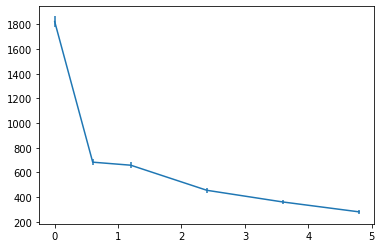

In [247]:
alhalf = [713, 693, 628, 701, 679, 688, 730, 657, 698, 646]
al1 = [645, 677, 659, 694, 550, 690, 662, 658, 736, 616]
al2 = [434, 569, 537, 434, 509, 428, 350, 430, 415, 447]
al3 = [310, 393, 398, 426, 301, 377, 328, 302, 349, 421]
al4 = [240, 340, 347, 335, 233, 227, 194, 349, 222, 318]

y = [avg(freeCounts), avg(alhalf), avg(al1), avg(al2), avg(al3), avg(al4)]

err = list(map(lambda x: uncertainty(x), y))


plt.errorbar([0, 0.6, 1.2, 2.4, 3.6, 4.8], y, yerr = err)
plt.show()

[604.2, 275.6, 175.4, 86.7, 51.2]
Attenuation Coefficient of copper (cm^-1): 0.5


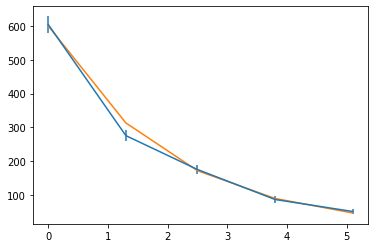

In [248]:
CuBackground = [677, 599, 688, 631, 619, 586, 552, 551, 544, 595]
Cu1 = [246, 329, 261, 258, 346, 254, 244, 241, 306, 271]
Cu2 = [173, 206, 191, 181, 167, 185, 174, 157, 136, 184]
Cu3 = [87, 79, 91, 96, 95, 83, 82, 70, 92, 92]
Cu4 = [54, 46, 40, 47, 59, 45, 64, 54, 52, 51]

Cux = [0, 1.3, 2.5, 3.8, 5.1]

Cuy = [avg(CuBackground), avg(Cu1), avg(Cu2), avg(Cu3), avg(Cu4)]
print(Cuy)

coefficient = 0.500
x_fit = list(map(lambda x: x * -1 * 0.5,  Cux))

Cu_err = list(map(lambda x: uncertainty(x), Cuy))

plt.errorbar([0, 1.3, 2.5, 3.8, 5.1], Cuy, yerr = Cu_err)
plt.plot(Cux, 600 * np.exp(x_fit))
print("Attenuation Coefficient of copper (cm^-1): "  + str(coefficient))
plt.show()


[505.4, 359.0, 284.8, 242.3, 215.2, 186.3]
Attenuation Coefficient for Aluminum (cm^-1): 0.205


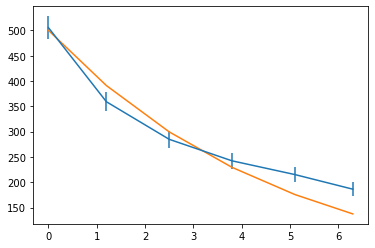

In [249]:
AlBackground = [569, 481, 481, 487, 527, 514, 499, 480, 503, 513]
Al1 = [351, 337, 414, 341, 410, 328, 300, 355, 335, 419]
Al2 = [266, 282, 242, 320, 231, 301, 310, 196, 353, 347]
Al3 = [159, 166, 260, 252, 281, 294, 269, 262, 278, 202]
Al4 = [245, 194, 215, 113, 242, 223, 219, 250, 234, 217]
Al5 = [175, 188, 194, 198, 202, 179, 178, 185, 164, 200]

Alx = [0, 1.2, 2.5, 3.8, 5.1, 6.3]
Aly = [avg(AlBackground), avg(Al1), avg(Al2), avg(Al3), avg(Al4), avg(Al5)]
print(Aly)

coefficient = 0.205
x_fit = list(map(lambda x: x * -1 * coefficient,  Alx))



Al_err = list(map(lambda x: uncertainty(x), Aly))

plt.errorbar(Alx, Aly, yerr = Al_err)
plt.plot(Alx, 500 * np.exp(x_fit))
print("Attenuation Coefficient for Aluminum (cm^-1): " + str(coefficient))
plt.show()


[1823.7, 683.3, 658.7, 455.3, 360.5, 280.5]


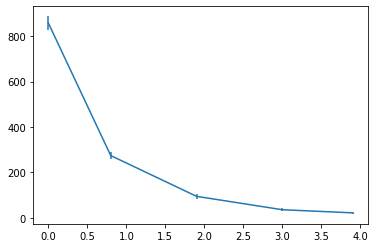

In [250]:
PbBackground = [748, 930, 810, 925, 821, 840, 934, 903, 843, 828]
Pb1 = [269, 251, 272, 296, 305, 301, 320, 286, 267, 177]
Pb2 = [90, 106, 102, 87, 87, 116, 75, 80, 102, 104]
Pb3 = [38, 46, 35, 42, 32, 34, 26, 38, 34, 35]
Pb4 = [25, 28, 23, 20, 24, 19, 20, 25, 20, 19]

Pbx = [0, 0.8, 1.9, 3.0, 3.9]
Pby = [avg(PbBackground), avg(Pb1), avg(Pb2), avg(Pb3), avg(Pb4)]
print(y)

Pb_err = list(map(lambda x: uncertainty(x), Pby))

plt.errorbar(Pbx, Pby, yerr = Pb_err)
plt.show()

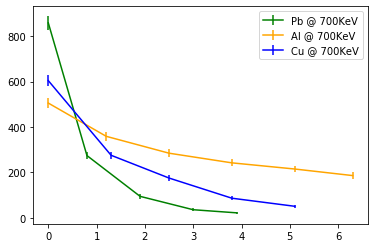

In [251]:
Alx = [0, 1.2, 2.5, 3.8, 5.1, 6.3]
Cux = [0, 1.3, 2.5, 3.8, 5.1]

# Pb_prop_uncert = [i/j for (i, j) in zip(Pb_err, Pby)]



plt.errorbar(Pbx, Pby, yerr = Pb_err,  label = 'Pb @ 700KeV', fmt = "g")
# plt.errorbar(Pbx, list(map(lambda x: np.log(x), Pby)), yerr = Pb_prop_uncert, fmt = "ro")
plt.errorbar(Alx, Aly, yerr = Al_err, label = 'Al @ 700KeV', fmt = "orange")
plt.errorbar(Cux, Cuy, yerr = Cu_err, label = 'Cu @ 700KeV', fmt = "b")
plt.legend()
plt.show()

Absorption coefficient: 0.15008456584724772 +/- 0.016113020275529615


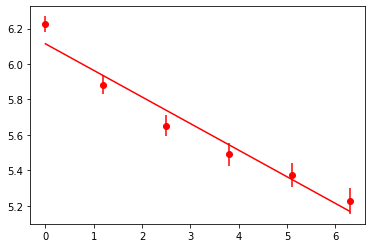

In [266]:
Alµ, Alb = plot_exp_fit(Alx, Aly, Al_err, 'r')

Absorption coefficient: 0.47991047106760903 +/- 0.019795724395653365


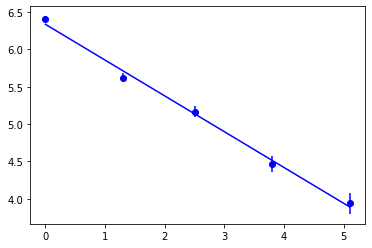

In [267]:
Cuµ, Cub = plot_exp_fit(Cux, Cuy, Cu_err, 'b')

Absorption coefficient: 0.9305344128321792 +/- 0.07878547560459288


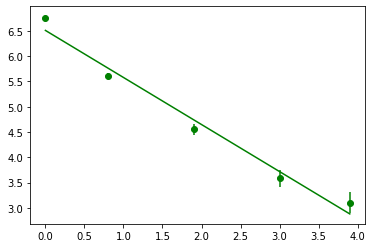

In [264]:
Pbµ, Pbb = plot_exp_fit(Pbx, Pby, Pb_err, 'g')

In [260]:
def chi_square(x : list, observed : list, m, b, uncertainties) -> float: 
    lst = []
    err = [i / j for (i, j) in zip(uncertainties, observed)]
    for i in range(len(observed)): 
        lst.append(((np.log(observed[i]) - (x[i] * m + b)) / err[i]) ** 2)
    return sum(lst)

In [261]:
print("chi_squared for Pb: " + str(chi_square(Pbx, Pby, Pbµ, Pbb, Pb_err)))

chi_squared for Pb: 63.26208017949239


In [262]:
print("chi_squared for Al: " + str(chi_square(Alx, Aly, Alµ, Alb, Al_err)))

chi_squared for Al: 10.782427991598581


In [263]:
print("chi_squared for Cu: " + str(chi_square(Cux, Cuy, Cuµ, Cub, Cu_err)))

chi_squared for Cu: 5.653264584793482
